### Objective
In this project, we will try to find the answer to few important questions such as (i) Body site showing most microbial diversity (ii) The most common genus (iii) Most ubiquitous microbe in the human body

#### Import the necessary modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
import seaborn as sns

#### Data loading and reading

In [50]:
df = pd.read_csv("F:/Projects/Microbiome/human_microbiome_project.csv")
pd.set_option('display.max_rows', False, 'display.max_columns', False)
df.head(2)

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242"
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100"


In [7]:
df.shape

(2915, 17)

In [8]:
df.columns

Index(['HMP ID', 'GOLD ID', 'Organism Name', 'Domain', 'NCBI Superkingdom',
       'HMP Isolation Body Site', 'Project Status', 'Current Finishing Level',
       'NCBI Submission Status', 'NCBI Project ID', 'Genbank ID', 'Gene Count',
       'IMG/HMP ID', 'HOMD ID', 'Sequencing Center', 'Funding Source',
       'Strain Repository ID'],
      dtype='object')

#### Missing data

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2915 entries, 0 to 2914
Data columns (total 17 columns):
HMP ID                     2915 non-null int64
GOLD ID                    1783 non-null object
Organism Name              2915 non-null object
Domain                     2712 non-null object
NCBI Superkingdom          2751 non-null object
HMP Isolation Body Site    2915 non-null object
Project Status             2915 non-null object
Current Finishing Level    1579 non-null object
NCBI Submission Status     2915 non-null object
NCBI Project ID            2915 non-null int64
Genbank ID                 1579 non-null object
Gene Count                 2915 non-null int64
IMG/HMP ID                 2915 non-null int64
HOMD ID                    397 non-null object
Sequencing Center          2911 non-null object
Funding Source             2915 non-null object
Strain Repository ID       1377 non-null object
dtypes: int64(4), object(13)
memory usage: 387.3+ KB


#### Gene count

In [10]:
df['Gene Count'].describe()

count    2915.000000
mean     1474.622642
std      1653.762393
min         0.000000
25%         0.000000
50%      1517.000000
75%      2489.500000
max      8490.000000
Name: Gene Count, dtype: float64

#### Find from where gene count is coming 0
It seems 1331 Bacteria have 0 gene count followed by 8 eukaryotes and 6 viruses

In [3]:
df_gene_count=df[df['Gene Count']==0]
df_gene_count['NCBI Superkingdom'].value_counts()

Bacteria     1331
Eukaryota       8
Viruses         6
Name: NCBI Superkingdom, dtype: int64

######  0 gene count probably associsted with the project status. It is possible that the 0 gene count for 1284 bacteria, 4 eukaryotes, 1 virus could be due to the poject(s) are still in progress at the time of data release.

In [4]:
df_no_gene_progress= df[(df['Gene Count']==0) & (df['Project Status']=='In Progress')]
df_no_gene_progress['NCBI Superkingdom'].value_counts()

Bacteria     1284
Eukaryota       4
Viruses         1
Name: NCBI Superkingdom, dtype: int64

##### For 47 bacteria, 5 viruses, 4 eukaryotes, the project has been completed. So the possible reason for 0 could be a reporting error.

In [13]:
df_no_gene_complete=df[(df['Gene Count']==0) & (df['Project Status']=='Complete')]
df_no_gene_complete['NCBI Superkingdom'].value_counts()

Bacteria     47
Viruses       5
Eukaryota     4
Name: NCBI Superkingdom, dtype: int64

##### Find the microbe with the highest gene count

In [6]:
max_value = df['Gene Count'].max()
max_value

8490

#### Find the name of microbe that has 8490 gene count

In [7]:
df[df['Gene Count']==8490]

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID
679,1211,Gi10716,Streptomyces sp. HGB0020,BACTERIAL,Bacteria,gastrointestinal_tract,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,72491,AGER00000000,8490,0,NaN,Broad Institute,NIH-HMP Sequencing Center,BEI HM-789


###### Find the body site with microbe having most diversity

In [8]:
df['HMP Isolation Body Site'].nunique()

16

In [9]:
df['HMP Isolation Body Site'].value_counts()

gastrointestinal_tract    745
unknown                   654
urogenital_tract          529
oral                      347
skin                      267
airways                   236
blood                      75
bone                       27
other                      13
eye                         8
wound                       4
ear                         4
heart                       2
nose                        2
liver                       1
lymph_nodes                 1
Name: HMP Isolation Body Site, dtype: int64

Text(0.5, 1.0, 'Diversity of microbes at different body sites')

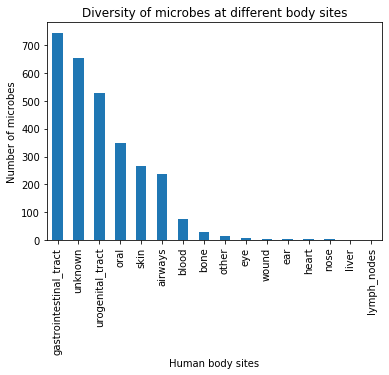

In [19]:
df['HMP Isolation Body Site'].value_counts().plot(kind='bar')
plt.ylabel('Number of microbes')
plt.xlabel('Human body sites')
plt.title('Diversity of microbes at different body sites')

#### Find the most common genus

In [21]:
df['Genus']= df['Organism Name'].str.split(' ').str[0]
df['species']=df['Organism Name'].str.split(' ').str[1]
df[['Genus','species']].head(3)

,Genus,species
0,Abiotrophia,defectiva
1,Achromobacter,piechaudii
2,Achromobacter,xylosoxidans


##### Unique genus

In [27]:
df['Genus'].nunique()

242

##### 242 genera found and Streptococcus is the most common genus

In [22]:
df['Genus'].value_counts().head(5)

Streptococcus        268
Staphylococcus       260
Enterococcus         178
Corynebacterium      132
Propionibacterium    104
Name: Genus, dtype: int64

##### The unique values in 'NCBI Superkingdom' column, there are 3 observations labeled 'Error!!!' Let's correct it

In [23]:
df.groupby('NCBI Superkingdom').count()

,HMP ID,GOLD ID,Organism Name,Domain,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus,species
NCBI Superkingdom,,,,,,,,,,,,,,,,,,
Archaea,2,2,2,2,2,2,2,2,2,2,2,2,0,2,2,2,2,2
Bacteria,2732,1656,2732,2546,2732,2732,1448,2732,2732,1448,2732,2732,385,2728,2732,1296,2732,2732
Error!!!,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Eukaryota,8,8,8,8,8,8,4,8,8,4,8,8,0,8,8,2,8,8
Viruses,6,0,6,6,6,6,5,6,6,5,6,6,0,6,6,6,6,6


##### As Streptococcus species are bacteria and by mistake they are labelled as 'Error!!!' Lets replace this 'Error!!!' with 'Bacteria'.

In [24]:
df[df['NCBI Superkingdom']=='Error!!!']

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus,species
2478,9176,Gi05045,Streptococcus downei F0415,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53567,AEKN00000000,2204,649990005,HOMD: tax_594,J. Craig Venter Institute,NIH-HMP Jumpstart Supplement,BEI HM-475,Streptococcus,downei
2481,9180,Gi05049,Streptococcus peroris ATCC 700780,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53059,AEVF00000000,1638,649990011,HOMD: tax_728,Baylor College of Medicine,NIH-HMP,ATCC 700780,Streptococcus,peroris
2487,9192,Gi05061,Streptococcus vestibularis F0396,BACTERIAL,Error!!!,oral,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,53573,AEKO00000000,1979,649990017,HOMD: tax_21,J. Craig Venter Institute,NIH-NIAID,BEI HM-561,Streptococcus,vestibularis


In [25]:
df['NCBI Superkingdom'].replace('Error!!!', 'Bacteria', inplace=True)

##### Let's check if it worked

In [26]:
df[df['NCBI Superkingdom']=='Error!!!']

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus,species


#### Fill the missing values in 'Domain' and 'NCBI Superkingdom' columns so one can infer the result of one column based on other

In [32]:
df[['Domain','NCBI Superkingdom']].isnull().sum()

Domain               203
NCBI Superkingdom    164
dtype: int64

##### But we cannot fill the missing values in either of these columns, if both values of the 2 columns are missing. For that let's checked how many such observations are present. And then I remove these observations if feasible

In [34]:
len(df.loc[df['Domain'].isnull()& df['NCBI Superkingdom'].isnull()])

17

In [35]:
df=df.drop(df[(df['Domain'].isnull()) & (df['NCBI Superkingdom'].isnull())].index)
df.shape

(2898, 19)

##### As many of the  rows have missing values for 'Domain' and 'NCBI Superkingdom'. The groupby followed by transform steps are not working and giving an error. To tackle this replace the missing value with the string 'NaN' in 'NCBI Superkingdom' and then proceeded to the filling missing value in 'Domain' column (groupby 'NCBI Superkingdom' and then transform it).

In [27]:
df['NCBI Superkingdom'].fillna('NaN', inplace=True)

In [28]:
print(df.shape)
df['Domain'] =df.groupby('NCBI Superkingdom')['Domain'].transform(lambda x: x.fillna(x.mode().max()))
df['Domain'].isnull().sum()

(2915, 19)


0

##### Now replace the string 'NaN' using groupby and transform methods

In [30]:
df['NCBI Superkingdom']= df.groupby('Domain')['NCBI Superkingdom'].transform(lambda x: x.replace('NaN', x.mode().max()))
df.loc[df['NCBI Superkingdom']=='NaN']
df.head(2)

,HMP ID,GOLD ID,Organism Name,Domain,NCBI Superkingdom,HMP Isolation Body Site,Project Status,Current Finishing Level,NCBI Submission Status,NCBI Project ID,Genbank ID,Gene Count,IMG/HMP ID,HOMD ID,Sequencing Center,Funding Source,Strain Repository ID,Genus,species
0,1,Gi03551,Abiotrophia defectiva ATCC 49176,BACTERIAL,Bacteria,oral,Complete,Level 3: Improved-High-Quality Draft,6. annotation (and sequence) public on NCBI site,33011,ACIN00000000,1950,643886181,HOMD: tax_389,Washington University Genome Sequencing Center,NIH-HMP Jumpstart Supplement,"ATCC 49176, CIP 103242",Abiotrophia,defectiva
1,4,Gi03555,Achromobacter piechaudii ATCC 43553,BACTERIAL,Bacteria,airways,Complete,Level 2: High-Quality Draft,6. annotation (and sequence) public on NCBI site,46343,ADMS00000000,5755,647000200,NaN,Baylor College of Medicine,NIH-HMP Jumpstart Supplement,"ATCC 43553, CIP 55774, LMG 6100",Achromobacter,piechaudii


##### Now lets check where all the different types of microbes are located in the human body

In [31]:
df.groupby('NCBI Superkingdom')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)

NCBI Superkingdom
Bacteria     16
Eukaryota     5
Viruses       1
Archaea       1
Name: HMP Isolation Body Site, dtype: int64

#### It apears that bacteria are located in all 16 studied body sites followed by eukaryotes in 5 body sites, followed by viruses and archaea

As bacteria are more ubiquitous in the human body. The diversity is most vast in gastrointentestinal tract.

In [33]:
bac=df.loc[df['Domain']=='BACTERIAL']
bac['HMP Isolation Body Site'].unique()

array(['oral', 'airways', 'urogenital_tract', 'skin',
       'gastrointestinal_tract', 'unknown', 'blood', 'eye', 'liver',
       'nose', 'wound', 'bone', 'ear', 'other', 'heart', 'lymph_nodes'],
      dtype=object)

Text(0.5, 1.0, 'Diversity of bacteria at different body sites')

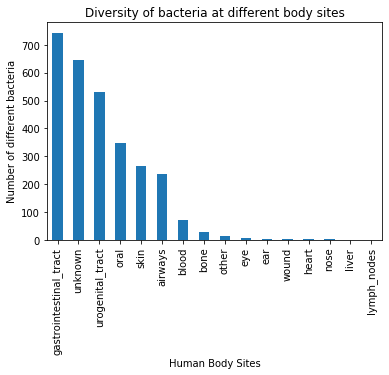

In [37]:
bac['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar')
plt.ylabel('Number of different bacteria')
plt.xlabel('Human Body Sites')
plt.title('Diversity of bacteria at different body sites')

#### Lets see the diversity of eukaryotic

In [38]:
euk=df.loc[df['Domain']=='EUKARYAL']
euk['HMP Isolation Body Site'].unique()

array(['unknown', 'skin', 'blood', 'wound', 'airways'], dtype=object)

Text(0.5, 1.0, 'Diversity of eukaryotes at different body sites')

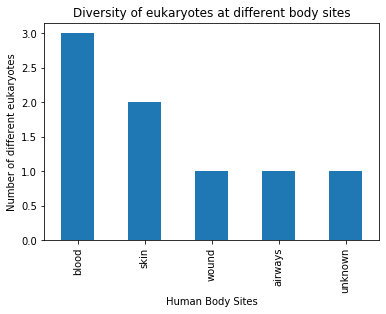

In [40]:
euk['HMP Isolation Body Site'].value_counts(ascending=False).plot(kind='bar')
plt.ylabel('Number of different eukaryotes')
plt.xlabel('Human Body Sites')
plt.title('Diversity of eukaryotes at different body sites')

#####  It appears that the most eukaryotes diversity exist in the blood

##### Lets see the location of viruses

In [41]:
vir=df.loc[df['Domain']=='VIRUS']
vir['HMP Isolation Body Site'].unique()

array(['unknown'], dtype=object)

##### This study didn't find any precise location for viruses

##### Let see the status of Archaea

In [43]:
arc=df.loc[df['Domain']=='ARCHAEAL']
arc['HMP Isolation Body Site'].unique()

array(['gastrointestinal_tract'], dtype=object)

##### This study is suggesting that Archaea is found primarily in the gastrointestinal tract

##### Lets find which is the most ubiquitous organism found in this analysis

                   HMP Isolation Body Site
Genus                                     
Staphylococcus                          11
Streptococcus                           10
Enterococcus                             9
Corynebacterium                          9
Actinomyces                              9
Propionibacterium                        8
Haemophilus                              8
Prevotella                               7
Fusobacterium                            7
Bifidobacterium                          6
Klebsiella                               6
Lactobacillus                            6
Porphyromonas                            6
Pseudomonas                              6
Neisseria                                6
Rothia                                   5
Bacteroides                              5
Gemella                                  5


Text(0.5, 1.0, 'Number of habitats for different microorganisms')

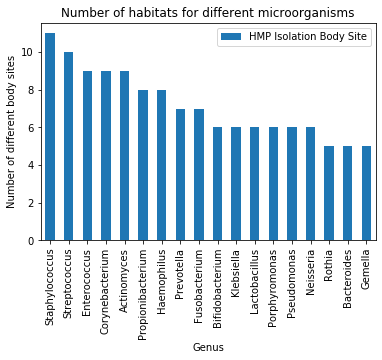

In [44]:
z=df.groupby('Genus')['HMP Isolation Body Site'].nunique().sort_values(ascending=False)
y=pd.DataFrame(z)
w=y[y['HMP Isolation Body Site']>4]
print(w)
w.plot(kind='bar')
plt.ylabel('Number of different body sites')
plt.title('Number of habitats for different microorganisms')

##### It appears that Staphylococcus is the most ubiquitous

In [45]:
staph=df.loc[df['Genus']=='Staphylococcus']
staph['HMP Isolation Body Site'].unique()

array(['urogenital_tract', 'skin', 'airways', 'unknown',
       'gastrointestinal_tract', 'nose', 'blood', 'bone', 'eye', 'ear',
       'other'], dtype=object)

#### And we know that this study, includes 2882 Bacteria, 8 eukaryotes, 6 viruses and 2 archaea

In [46]:
df['NCBI Superkingdom'].value_counts()

Bacteria     2899
Eukaryota       8
Viruses         6
Archaea         2
Name: NCBI Superkingdom, dtype: int64

##### See the  list of names of viruses, eukaryotes and archaea.

In [47]:
viruses= df[df['NCBI Superkingdom'] =='Viruses']
viruses['Organism Name']

532            Actinomyces phage vB_Ana_GK1
2852    Pseudomonas phage F_HA0480sp/Pa1651
2853                Pseudomonas phage JBD18
2854                Pseudomonas phage JBD25
2855                Pseudomonas phage JBD26
2856                Pseudomonas phage JBD67
Name: Organism Name, dtype: object

In [48]:
eukaryotes= df[df['NCBI Superkingdom']=='Eukaryota']
eukaryotes['Organism Name']

601                  Exophiala dermatitidis NIH/UT8656
983                    Phialophora europaea CBS 101466
985     Mucor circinelloides f. circinelloides 1006PhL
999                     Pichia kudriavzevii CAB39-6420
1065                   Sporothrix schenckii ATCC 58251
2555                       Candida glabrata CAB52-4041
2556                   Candida tropicalis CAB54-6763-3
2557                   Candida parapsilosis CAB50-2638
Name: Organism Name, dtype: object

In [49]:
archaea= df[df['NCBI Superkingdom']=='Archaea']
archaea['Organism Name']

302    Methanobrevibacter smithii DSM 2374
303    Methanobrevibacter smithii DSM 2375
Name: Organism Name, dtype: object

### Conclusion
The findings from this analyses suggests (i) Gastrointestine tract of human body harbor most diverse microbes, (ii) Streptomyces shows the maximum gene count in the human (iii) Streptococcus is most common genus whereas Staphylococcus is most ubiquitous in humans body.